<a href="https://colab.research.google.com/github/winnie9802/COMP6245/blob/main/labTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

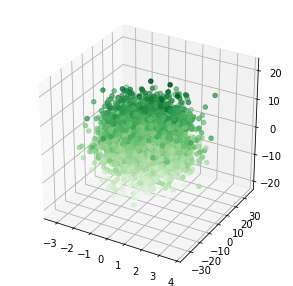

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
mean = [0, 0, 0]
cov = [[1, 0, 0], [0, 100,0], [0, 0, 30]] 
x, y , z= np.random.multivariate_normal(mean, cov, 5000).T
fig, ax = plt.subplots(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, cmap='Greens')

plt.show()

<class 'numpy.ndarray'>
(400,)
(200, 3) (200,) (200, 3) (200,)
Initial Percentage Correct: 61.50
Percentage Correct After Training:100.00  98.50


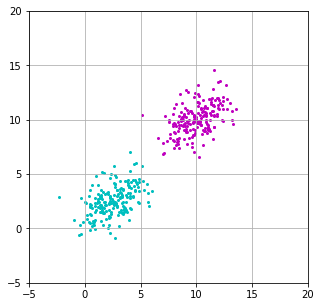

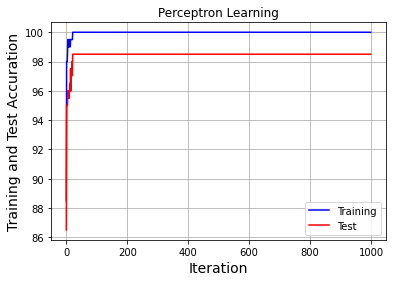

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
NumDataPerClass = 200
m1 = [[2.5,2.5]] #平均数
m2 = [[10,10]]
C = [[2,1],[1,2]] #协方差矩阵

A = np.linalg.cholesky(C) 

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1 #x1和x2的平均值不同
X2 = U1 @ A.T + m2 #x1和x2是两个高斯分布

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.set_xlim(-5,20)
ax.set_ylim(-5,20)
plt.grid()

#concatenate
X = np.concatenate((X1, X2), axis=0) #把两个类放在一起
O = np.ones((2*NumDataPerClass, 1))  
X = np.append(X, O, axis=1)  #加上bias的那个类
print(type(X))
#setting up targets labels   为两类设定标签
labelPos = np.ones(NumDataPerClass)  
labelNeg = - 1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg) )

#Partipationing the data into training set and dataset
rIndex = np.random.permutation(2*NumDataPerClass) #相当于对数组的序号进行洗牌
print(rIndex.shape)
Xr = X[rIndex,]  #洗牌后就打乱了原来的顺序了
yr = y[rIndex,]

X_train = Xr[0:NumDataPerClass]  #把一半的数据作为测试集
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Ntrain = NumDataPerClass
Ntest = NumDataPerClass

#计算分类正确的函数
def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect += 1
  return 100*nCorrect/N

w = np.random.randn(3)
print('Initial Percentage Correct:%6.2f' %(PercentCorrect(X_train, y_train, w)))
MaxIter = 1000
alpha = 0.002 #学习率

P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

for iter in range(MaxIter):
  
  '''        
  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]

  if (y_train[r] * np.dot(x,w)<0): #标签值*预测值
    w += alpha * y_train[r] * x
  '''
  for i in range(np.size(X_train,0)):
    if (y_train[i]*np.dot(X_train[i,:],w)<0):
      w += alpha * y_train[i] * X_train[i,:] #用梯度下降的方法更新参数
  
  P_train[iter] = PercentCorrect(X_train, y_train, w)
  P_test[iter] = PercentCorrect(X_test, y_test, w)
  
print('Percentage Correct After Training:%6.2f %6.2f'
  %(PercentCorrect(X_train, y_train, w),PercentCorrect(X_test,y_test,w)))

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter),P_train,'b',label="Training")
ax.plot(range(MaxIter),P_test,'r',label="Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuration', fontsize=14)
ax.set_xlabel('Iteration',fontsize=14)
plt.savefig('learningCurves.png')

In [ ]:
w = np.random.randn(2)
print(w)
print(np.size(X_train,0))

[-1.86480885  0.15310622]
200


In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train,y_train) #为model设置训练数据
yh_train = model.predict(X_train) #由模型得到的训练结果
print("Accuracy on training set:%6.2f"%(accuracy_score(yh_train,y_train)))

yh_test = model.predict(X_test) #为model设置验证集
print("Accuracy on test set:%6.2f"%(accuracy_score(yh_test,y_test)))

if (accuracy_score(yh_test,y_test)>0.99):
  print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:  1.00
Accuracy on test set:  1.00
Wow, Perfect Classification on Separable dataset!


(476, 166)
(476, 167)
(476,)
(6598, 167)
Initial Percentage Correct: 34.66
Percentage Correct After Training: 43.49  15.41


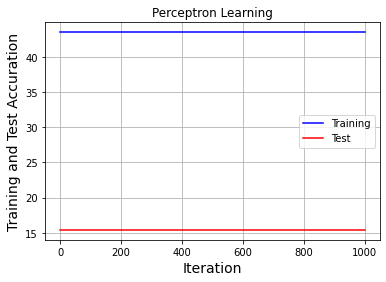

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
NumDataPerClass = 100


U1 = np.random.randn(NumDataPerClass,2)

with open('clean1_data.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = ",", skiprows = 0, dtype = int, usecols=(range(2,168,1)))

X_train = np.array(data)
print(X_train.shape)
#concatenate
O = np.ones((np.size(X_train,0),1))
X_train = np.concatenate((X_train,O),axis=1)
print(X_train.shape)

with open('clean1_data.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = ",", skiprows = 0, dtype = float, usecols=(168))

y_train = np.array(data)
print(y_train.shape)

with open('clean2_data.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = ",", skiprows=0, dtype=int, usecols=(range(2,168,1)) )

X_test = np.array(data)
O = np.ones((np.size(X_test,0),1))
X_test = np.concatenate((X_test,O),axis=1)
print(X_test.shape)

with open('clean2_data.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = ",", skiprows=0, dtype=float, usecols=(168))

y_test = np.array(data)

def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect += 1
  return 100*nCorrect/N

w = np.random.randn(np.size(X_train,1))

print('Initial Percentage Correct:%6.2f' %(PercentCorrect(X_train, y_train, w)))
MaxIter = 1000
alpha = 0.01

P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

for iter in range(MaxIter):
  
  
  for i in range(np.size(X_train,0)):
    if (y_train[i]*np.dot(X_train[i,:],w)<0):
      w += alpha * y_train[i] * X_train[i,:]

  P_train[iter] = PercentCorrect(X_train, y_train, w)
  P_test[iter] = PercentCorrect(X_test, y_test, w)
  
print('Percentage Correct After Training:%6.2f %6.2f'
  %(PercentCorrect(X_train, y_train, w),PercentCorrect(X_test,y_test,w)))
'''
for i in range(np.size(X_test,0)):
  print(np.dot(X_test, w))
'''

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter),P_train,'b',label="Training")
ax.plot(range(MaxIter),P_test,'r',label="Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuration', fontsize=14)
ax.set_xlabel('Iteration',fontsize=14)
plt.savefig('learningCurves.png')

In [ ]:

print(list(range(2,167,1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166]


(100, 10000)
(100, 10001)
(100,)
(100, 10001)
Initial Percentage Correct: 49.00
Percentage Correct After Training:100.00  79.00
272


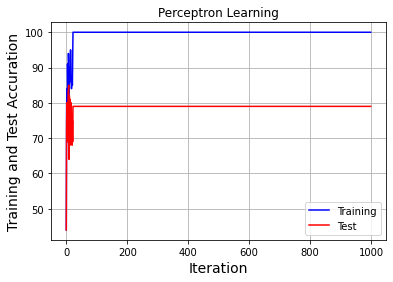

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
NumDataPerClass = 100


U1 = np.random.randn(NumDataPerClass,2)

#定义训练集
with open('arcene_train.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = " ", skiprows = 0, dtype = int, usecols=(range(0,10000,1)))

X_train = np.array(data)
print(X_train.shape)
#concatenate
O = np.ones((np.size(X_train,0),1))
X_train = np.concatenate((X_train,O),axis=1)
print(X_train.shape)

with open('arcene_train_labels.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = " ", skiprows = 0, dtype = int)

y_train = np.array(data)
print(y_train.shape)

#定义验证集
with open('arcene_valid.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = " ", skiprows=0, dtype=int, usecols=(range(0,10000,1)) )

X_test = np.array(data)
O = np.ones((np.size(X_test,0),1))
X_test = np.concatenate((X_test,O),axis=1)
print(X_test.shape)

with open('arcene_valid_labels.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = " ", skiprows=0, dtype=int)

y_test = np.array(data)

#定义测试集
with open('arcene_test.csv',encoding = 'utf-8') as f:
  data = np.loadtxt(f, delimiter = ",", dtype=int, usecols=(range(0,10000,1)) )

X_Test = np.array(data)

O = np.ones((np.size(X_Test,0),1))
X_Test = np.concatenate((X_Test, O),axis = 1)

def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect += 1
  return 100*nCorrect/N

w = np.random.randn(np.size(X_train,1))

print('Initial Percentage Correct:%6.2f' %(PercentCorrect(X_train, y_train, w)))
MaxIter = 1000
alpha = 0.001

P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
CorrectNum = 0
for iter in range(MaxIter):
  
  
  for i in range(np.size(X_train,0)):
    if (y_train[i]*np.dot(X_train[i,:],w)<0):
      w += alpha * y_train[i] * X_train[i,:]

  P_train[iter] = PercentCorrect(X_train, y_train, w)

  
  P_test[iter] = PercentCorrect(X_test, y_test, w)
  
print('Percentage Correct After Training:%6.2f %6.2f'
  %(PercentCorrect(X_train, y_train, w),PercentCorrect(X_test,y_test,w)))
'''
for i in range(np.size(X_test,0)):
  print(np.dot(X_test, w))
'''
for i in range(np.size(X_Test,0)):
  if np.dot(X_Test[i,:],w)>0:
    CorrectNum +=1
print(CorrectNum)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter),P_train,'b',label="Training")
ax.plot(range(MaxIter),P_test,'r',label="Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuration', fontsize=14)
ax.set_xlabel('Iteration',fontsize=14)
plt.savefig('learningCurves.png')

